<img align="center" src="data/handout/course.png" width="800">

## Hough Transform - Assignment 1
    Instructor: Kris                          TAs: Rawal (Lead), Yan, Zen, Wen-Hsuan, Paritosh, Qichen

In this assignment you will be implementing a Hough Transform based line detector. 

<img align="center" src="data/handout/ht.gif" width="500">

---
## Theory Questions (25 points)
**Grading**: 
- Each question is 5 points. 
- Please add your answers to the writeup. Insert images whenever necessary.
- Show all your work to obtain full credit.

**Q1**: Show that using $ x\cos \theta + y \sin \theta - \rho = 0 $, each image point $(x, y)$ results in a sinsuoid in $(\rho, \theta)$ hough space.  
Use the formulation, $a \sin \theta + b \cos \theta = A \sin(\theta + \phi)$ for the sinsuoid.  
Write the amplitude \\(A \\) and phase \\( \phi \\) of the sinusoid as a function of \\( (x, y) \\). 

Given $x \cos\theta + y \sin\theta = \rho$

For each point $(xi, yi)$ in the image space, <br><br> $ x_{i}\cos \theta + y_{i} \sin \theta - \rho = 0 $ <br><br> Let A =  $\sqrt{x_{i}^2 + y_{i}^2} $ <br><br> $\rho = \sqrt{x_{i}^2 + y_{i}^2} (\frac{x_{i}}{\sqrt{{x_{i}^2 + y_{i}^2}}}\cos \theta + \frac{y_{i}}{\sqrt{{x_{i}^2 + y_{i}^2}}} \sin \theta)$ <br><br> Let <br>$ \sin a = \frac{x_{i}}{\sqrt{{x_{i}^2 + y_{i}^2}}}$ <br> and $\cos a =\frac{y_{i}}{\sqrt{{x_{i}^2 + y_{i}^2}}}$ <br> from the given trigonometric identity: $(\sin a \cos \theta + \cos a \sin \theta) = \sin(a+ \theta)$ <br><br> $\rho = A (\sin a \cos \theta + \cos a \sin \theta) = A \sin(a+ \theta)$ <br>
   
Hence for each point (xi, yi) in the image space, the ρ is sinusoidal function of θ with amplitude A and phase a


**Q2**: Why do we parameterize the line in terms of \\(\rho, \theta\\) instead of slope and intercept \\((m, c)\\)?  
Also write the slope \\(m\\) and intercept \\(c\\) as a function of \\(\rho\\) and \\(\theta\\). 

In the slope intercept form, there are cases when the accumulator array becomes really large. Consider a vertical line in image space, the slope intercept form for this line is infinty (m) and intercept is at negative infinity and positive infinity.

$  \rho = x\cos \theta + y \sin \theta $

$  \rho = \sin \theta$  $(x \large\frac{\cos \theta}{\sin \theta} + y)  $

In the slope intercept form 

$  y = $m$ x + c $

From the above two equations 
 $ m = - \large \frac{ \cos \theta}{\sin \theta}$ and
 
 $ c = \large\frac{\rho}{\sin \theta}$


**Q3**: Assume the image points \\((x, y)\\) are in an image of width \\(W\\) and height \\(H\\), \\(x \in [1, W], y \in [1, H]\\).  
What is the maximum absolute value of \\(\rho\\) and what is the range of \\(\theta\\)?

The maximum absolute value for the $\rho = \sqrt{ xmax^2 + ymax^2} = \sqrt{ W^2 + H^2}$  and range of the $\theta$ is from $[0, 360]$

**Q4**: For points $(10, 10)$, $(15, 15)$ and $(30, 30)$ in the image, plot the corresponding sinusoid waves in Hough space $(\rho, \theta)$.  
Also visualize how their intersection point defines the line (what is ($m, c$) for this line?).  
Please add the plot as image.

($m, c$) for this line is (1, 0) as its slope is $45 deg$ and it has intercepts at $(0, 0)$

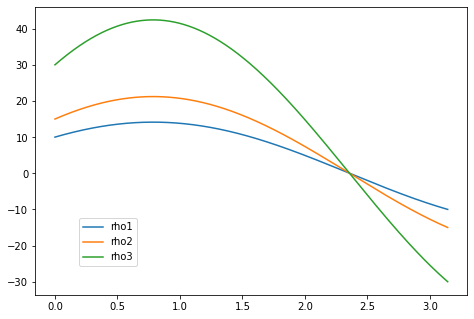

In [33]:
x= [10,15,30]
y= [10,15,30]
import math
import numpy as np
import matplotlib.pyplot as plt
rho1=[]
rho2=[]
rho2=[]
A = [math.sqrt(x[i]**2 + y[i]**2) for i in range(len(x))]
alpha = [np.arcsin(x[i]/beta[i]) for i in range(len(x))]
theta = np.linspace(-0,np.pi,1000)
rho1 = A[0]*np.sin(theta+alpha[0]) 
rho2 = A[1]*np.sin(theta+alpha[1]) 
rho3 = A[2]*np.sin(theta+alpha[2]) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(theta, rho1,label="rho1")
ax.plot(theta, rho2,label="rho2")
ax.plot(theta, rho3,label="rho3")

ax.legend(loc=(0.1,0.1)) 

plt.show()

**Q5**: How does the dimension of parameter space affects Hough Transform method? What would you do when the parameter space is high, i.e., 3D or 4D instead of 2D? Briefly explain your method.

As the dimension of the parameter space increases, the computational complexity increases, thereby increasing the difficulty to find every possible parameter. The decrease in parameter space will lead to a loss of a lot of features, causing fewer votes in the right bin. When the parameter space is high, like 3D or 4D, to efficiently compute the features, we can use 3D or 4D hough space and increase the size of the accumulator (Accumulator cube , polyhedral, Ball) accordingly. In addition, for better computational efficiency, we can use gradient information to calculate higher parameter space.  